
# Examples illustrating the use of the Qmod class.

This notebook shows how to construct and use objects of the Qmod class, which is defined in Q_investment.py.

In [1]:
# Preamble
import numpy as np
import matplotlib.pyplot as plt
from Q_investment import Qmod

# Examples

## 1. Model solution and policy rule.

We first create and solve a model. To solve the model is to find its policy rule: a function specifying what is the optimal value for capital at $t+1$ given capital at $t$ (implicitly defining optimal investment).

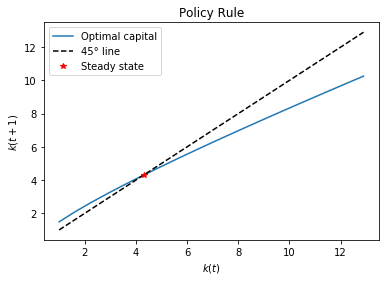

In [2]:
# Create model object
Qexample = Qmod()
# Solve to find the policy rule (k[t+1] in terms of k[t])
Qexample.solve()

# Plot policy rule
k = np.linspace(1,3*Qexample.kss,20)

plt.figure()
plt.plot(k,[Qexample.k1Func(x) for x in k], label = "Optimal capital")
plt.plot(k,k, linestyle = '--', color = 'k', label = "45° line")
plt.plot(Qexample.kss,Qexample.kss,'*r', label = "Steady state")
plt.title('Policy Rule')
plt.xlabel('$k(t)$')
plt.ylabel('$k(t+1)$')
plt.legend()
plt.show()

## 2. Simulation of capital dynamics.

The class can also compute the dynamic adjustment of capital from a given starting level.

We can use this to see how adjustment costs affect the speed of adjustment.

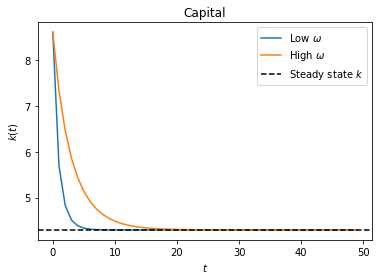

In [3]:
# Create and solve two instances, one with high and one with low adjustment costs omega
Qlow  = Qmod(omega =  0.1)
Qhigh = Qmod(omega =  0.9)

Qlow.solve()
Qhigh.solve()

# Simulate adjustment from an initial capital level
k0 = 2*Qhigh.kss
t = 50
k_low = Qlow.simulate(k0,t)
k_high = Qhigh.simulate(k0,t)

# Plot
plt.figure()
plt.plot(k_low, label = 'Low $\\omega$')
plt.plot(k_high, label = 'High $\\omega$')
plt.axhline(y = Qhigh.kss,linestyle = '--',color = 'k', label = 'Steady state ${k}$')
plt.title('Capital')
plt.xlabel('$t$')
plt.ylabel('$k(t)$')
plt.legend()
plt.show()

## 3. Phase diagram.

The class can plot a model's phase diagram. The model has to be solved if the stable arm is to be displayed.

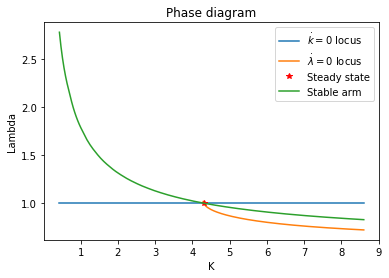

In [4]:
# Create and solve model object
Qexample = Qmod()
Qexample.solve()
# Generate its phase diagram
Qexample.phase_diagram(stableArm = True)

Why is the $\dot{\lambda}=0$ locus truncated?

With constant prices, there may be instances where $\lambda_t$ can not be equal to $\lambda_{t+1}$. Notice first that $\lambda_t$ is a function of $\lambda_{t+1}$ (current marginal value of capital is a function of its expected marginal value tomorrow).

If, for instance, $k_t$ is low, the marginal productivity of capital will be high, and this can push $\lambda_t$ above $\lambda_{t+1}$, as is the case in the following diagram, which plots $\lambda_t$ computed from the envelope condition at a fixed $k$ and varying $\lambda_{t+1}$.

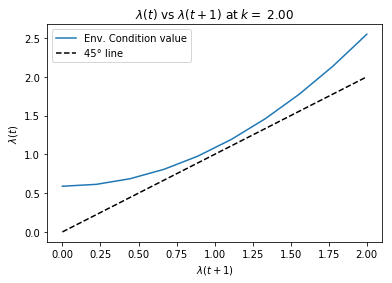

In [5]:
Qexample.plotEnvelopeCond(k=2)

Note that the envelope condition never crosses the $\lambda_t = \lambda_{t+1}$ line. Thus, there is no $\dot{\lambda}=0$ locus at $k=2$.

However, zooming in we can see that the locus is well defined around the steady state level of capital.

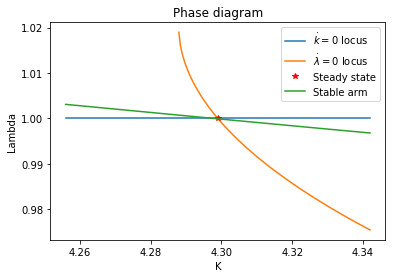

In [6]:
Qexample.phase_diagram( k_min = 0.99,k_max = 1.01 , stableArm = True)